# Testing

### Test Driven Development:
    1. write tests
    2. make them fail
    3. write code
    4. make them pass
    5. repeat

## Unittest

1. every test class must be derived from *unittest.TestCase*
2. every test function name must have prefix *test_*
3. use *assert* functions to check result
4. use *setUp()* for initialization before test case
5. use *tearDown()* for code executed after test case
6. python -m unittest -v test_module


# Profiling

is a form of dynamic program analysis that measures, for example, the space (memory) or time complexity of a program, the usage of particular instructions, or the frequency and duration of function calls [Wikipedia]

## Manual profiling 

In [48]:
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x
    
def fibonacci_2(n):
    if n < 0:
        raise Exception()
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_2(n-1) + fibonacci_2(n-2)

In [54]:
import time

def manual_profile(foo, x):
    time_start = time.time()
    foo(x)
    return time.time() - time_start

manual_profile(fibonacci_1,20), manual_profile(fibonacci_2,20)

(4.76837158203125e-06, 0.0036957263946533203)

In [59]:
### timeit decorator
import time


def timeit(foo, *args, **kwags):
    def wrap(*args, **kwags):
        time_start = time.time()
        result = foo(*args, **kwags)
        print('%s took %f.6 sec' % (foo.__name__, time.time() - time_start))
        return result
    return wrap

@timeit
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x

fibonacci_1(20)

fibonacci_1 took 0.000006.6 sec


6765

### Magic commands in jupyter notebook

In [ ]:
%time fibonacci_2(20)

In [65]:
%timeit -n 1 fibonacci_1(20)

fibonacci_1 took 0.000005.6 sec
fibonacci_1 took 0.000003.6 sec
fibonacci_1 took 0.000002.6 sec
fibonacci_1 took 0.000005.6 sec
fibonacci_1 took 0.000007.6 sec
fibonacci_1 took 0.000005.6 sec
fibonacci_1 took 0.000005.6 sec
The slowest run took 21.93 times longer than the fastest. This could mean that an intermediate result is being cached.
157 µs ± 206 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


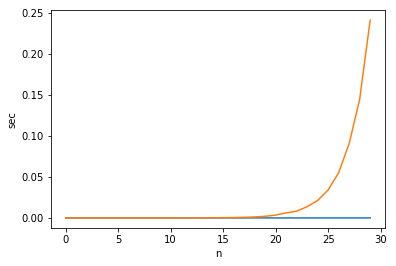

In [71]:
def fibonacci_1(n):
    a, b = 0, 1
    
    if n < 0:
        raise Exception()
    elif n == 0:
        return a
    elif n == 1:
        return b
    
    x = 1
    for i in range(n-2):
        x, b, a = x+b, x, b
    return x
    
def fibonacci_2(n):
    if n < 0:
        raise Exception()
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    
    return fibonacci_2(n-1) + fibonacci_2(n-2)

import time

def manual_profile(foo, x):
    time_start = time.time()
    foo(x)
    return time.time() - time_start

# draw plot
import matplotlib.pylab as plt
%matplotlib inline

n = range(30)
time_spend_1 = [manual_profile(fibonacci_1, x) for x in n]
time_spend_2 = [manual_profile(fibonacci_2, x) for x in n]

# import numpy as np
# time_spend_1 = np.log(time_spend_1)
# time_spend_2 = np.log(time_spend_2)

plt.plot(n, time_spend_1, label='O(n)')
plt.plot(n, time_spend_2, label='O(2^n)')
plt.xlabel('n')
plt.ylabel('sec')
plt.show()

### cProfile

In [88]:
%%bash 
python -m cProfile -s time profiling_case1.py

         57837 function calls (57815 primitive calls) in 8.608 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    8.583    8.583    8.583    8.583 profiling_case1.py:1(bubble_sort)
    10000    0.007    0.000    0.016    0.000 random.py:179(randrange)
    10000    0.006    0.000    0.009    0.000 random.py:229(_randbelow)
    10000    0.003    0.000    0.019    0.000 random.py:223(randint)
        1    0.003    0.003    0.022    0.022 profiling_case1.py:12(<listcomp>)
    16472    0.002    0.000    0.002    0.000 {method 'getrandbits' of '_random.Random' objects}
        3    0.002    0.001    0.002    0.001 {built-in method _imp.create_dynamic}
    10000    0.001    0.000    0.001    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {built-in method posix.urandom}
       21    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap_external>:1247(find_spec)
        2

In [89]:
%%bash 
python -m cProfile -s time profiling_case2.py

         865222 function calls (845202 primitive calls) in 0.168 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     9999    0.096    0.000    0.128    0.000 profiling_case2.py:1(merge)
   646917    0.027    0.000    0.027    0.000 {built-in method builtins.len}
  19999/1    0.013    0.000    0.143    0.143 profiling_case2.py:21(merge_sort)
    10000    0.007    0.000    0.016    0.000 random.py:179(randrange)
    10000    0.006    0.000    0.008    0.000 random.py:229(_randbelow)
   120481    0.006    0.000    0.006    0.000 {method 'append' of 'list' objects}
    10000    0.003    0.000    0.019    0.000 random.py:223(randint)
        1    0.003    0.003    0.022    0.022 profiling_case2.py:35(<listcomp>)
    16472    0.002    0.000    0.002    0.000 {method 'getrandbits' of '_random.Random' objects}
        3    0.002    0.001    0.002    0.001 {built-in method _imp.create_dynamic}
     9999    0.001    0.000    0.001  

### pstats

In [90]:
%%bash 
python -m cProfile -s time -o case1.prof profiling_case1.py
python -m cProfile -s time -o case2.prof profiling_case2.py

In [91]:
%%bash
ls -l

total 100
-rw-rw-r-- 1 denaas denaas 13380 сен 28 00:37 case1.prof
-rw-rw-r-- 1 denaas denaas 13779 сен 28 00:37 case2.prof
-rw-rw-r-- 1 denaas denaas   201 сен 27 23:15 nose_tests.py
-rw-rw-r-- 1 denaas denaas   268 сен 28 00:35 profiling_case1.py
-rw-rw-r-- 1 denaas denaas   661 сен 28 00:35 profiling_case2.py
drwxrwxr-x 2 denaas denaas  4096 сен 28 00:34 __pycache__
-rw-rw-r-- 1 denaas denaas   190 сен 27 22:46 real_numbers.py
-rw-rw-r-- 1 denaas denaas 41114 сен 28 00:36 testing.ipynb
-rw-rw-r-- 1 denaas denaas   446 сен 27 23:02 test_realNumbers.py


In [95]:
import pstats
p = pstats.Stats('case2.prof')
p.sort_stats('cumtime').print_stats()

Thu Sep 28 00:37:42 2017    case2.prof

         865222 function calls (845202 primitive calls) in 0.162 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/1    0.000    0.000    0.162    0.162 {built-in method builtins.exec}
        1    0.000    0.000    0.162    0.162 profiling_case2.py:1(<module>)
  19999/1    0.013    0.000    0.140    0.140 profiling_case2.py:21(merge_sort)
     9999    0.095    0.000    0.126    0.000 profiling_case2.py:1(merge)
   646917    0.026    0.000    0.026    0.000 {built-in method builtins.len}
        1    0.002    0.002    0.019    0.019 profiling_case2.py:35(<listcomp>)
    10000    0.003    0.000    0.017    0.000 /opt/anaconda3/lib/python3.5/random.py:223(randint)
    10000    0.006    0.000    0.014    0.000 /opt/anaconda3/lib/python3.5/random.py:179(randrange)
    10000    0.005    0.000    0.008    0.000 /opt/anaconda3/lib/python3.5/random.py:229(_randbelow)
   120481    0.00

In [109]:
import random

random.seed(1337)
a = [str(random.randint(0,10000)) for x in range(1000)]
%timeit a.index(a[-1])

29.7 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [106]:
random.seed(1337)
a = {str(random.randint(0,10000)):x for x in range(1000)}
%timeit a[list(a.keys())[-1]]
# a.keys()

6.61 µs ± 64.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### pycallgraph

In [112]:
%%bash
# pip install pycallgraph
pycallgraph graphviz -- profiling_case2.py

### memory profiler

In [126]:
%%bash
# pip install memory_profiler

In [127]:
%%bash
python -m memory_profiler profiling_case3.py

Filename: profiling_case3.py

Line #    Mem usage    Increment   Line Contents
    22     47.2 MiB      0.0 MiB   @profile
    23                             def main():
    24     47.2 MiB      0.0 MiB   	import random
    25     47.2 MiB      0.0 MiB   	random.seed(1337)
    26     47.2 MiB      0.0 MiB   	s = Storage()
    27     85.4 MiB     38.1 MiB   	for x in range(10):
    28     85.4 MiB      0.0 MiB   		s.update(str(random.randint(0, 10)), [random.randint(0, 1000)]*1000000)
    29     85.4 MiB      0.0 MiB   		s.delete(str(random.randint(0, 10)))


